# Project: TMDb Movie Data
---
## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangle)
 - [General Properties](#general)
 - [Cleaning Data](#cleaning)
 
 
- [Exploratory Data Analysis](#exploring)
 - [Preparing Data Analysis](#prep)
 - [Research Questions](#questions)
      - [Question 1](#questions)
      - [Question 2](#question2)
      - [Question 3](#question3)
      - [Question 4](#question4)
      - [Question 5](#question5)
      
      
- [Conclusion](#concl)
 - [Limitation](#limit)
 
 
- [References](#refr)

<a name='intro'></a>
## Introduction

> In this project, I will explore `TMDb movie dataset` which contains information about 10,000 movies, go through the data analysis process,<br> and see how everything fits together.

> ### Note:
 - Certain columns, like `'cast'` and `‘genres’`, contain multiple values separated by pipe `(|)` characters.
 - There are some odd characters in the `‘cast’` column.
 - The final two columns ending with `“_adj”` show the budget and revenue of the associated movie in terms of 2010 dollars, <br>
accounting for inflation over
time.

> ### Questions to be answered:
> 1. Movie(s) which made most and least profit ? 
> 2. Movie market growth trends
> 3. How long does the audience want their movies to be ? 
> 4. Which genres are most popular ?
> 5. Most active director and his favorite actors/actresses ?


In [1]:
# import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set style
sns.set_style('darkgrid')

<a name='wrangle'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

<a name='general'></a>
### General Properties

In [109]:
# load data and check first five rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [110]:
# Number of rows and columns
df.shape

(10866, 21)

In [111]:
# Check datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [112]:
# number of unique values per each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [113]:
# number of rows with missing values per each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [114]:
# Number of duplicates
df.duplicated().sum()

1

<a name='cleaning'></a>

### Cleaning Data
> - Drop unnecessary columns for our investigation
- Drop rows with zero values 
- Drop nulls
- Dedupe

> First, let's drop unneccessary columns before executing `dropna()` and `drop_duplicates()` to avoid losing rows that might contain meaningful data in them 

In [115]:
# Define columns to drop
drop_cols = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'production_companies', 
             'overview', 'release_date', 'budget_adj', 'revenue_adj']

df.drop(drop_cols, axis=1, inplace=True)

In [116]:
# Check the shape
df.shape

(10866, 11)

> Next, let's drop rows that contain zeroes since there is no indication whether these zeroes are actually zeroes or just missing.

In [117]:
# Take a look how many rows contain zeroes 
df[(df == 0).any(1)].count()

popularity        7011
budget            7011
revenue           7011
original_title    7011
cast              6939
director          6968
runtime           7011
genres            6988
vote_count        7011
vote_average      7011
release_year      7011
dtype: int64

In [118]:
# Keep rows with non-zero values everywhere 
df = df[(df != 0).all(1)]

## or dropping rows with any zero values
# drop_zeroes = df[(df == 0).any(1)].index
# df.drop(drop_zeroes, inplace=True)

# Check shape
df.shape

(3855, 11)

> Now, we are going to finish our cleaning by removing nulls and duplicates.

In [119]:
# Check null
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [120]:
# drop nulls 
df.dropna(inplace=True)

# check shape
df.shape

(3850, 11)

In [121]:
# check duplicates
df.duplicated().sum()

1

In [122]:
# we have one duplicate, let's take a look
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010


In [123]:
# dedupe and check shape
df.drop_duplicates(inplace=True)

df.shape

(3849, 11)

In [124]:
# save 
df.to_csv('tmdb-movies-clean.csv', index=False)

> Finally, throughout cleaning processes, we now have our dataframe with ***3849 rows*** with ***11 columns*** ready to be analyzed.

<a name='exploring'></a>

## Exploratory Data Analysis
> In this section, we are going to compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.<br>
We will start with looking at one variable at a time, and then follow it up by looking at relationships between variables.

<a name='prep'></a>

### Preparing Data Analysis
> - Manipulate dataframe
- Define functions that will be used to answer proposed questions
- Prepare subsets of data for each questions

In [2]:
# load data and check
df = pd.read_csv('tmdb-movies-clean.csv')
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


> To start with, let's manipulate our dataframe before answering some specific questions.<br>
- rearrange our column orders for easier slicing relative to our proposed questions
- add `'profit'` column defined as $profit = revenue - budget$ <br>
- add `'break_even'` column with `'yes'` or `'no'` where `break-even point` is defined as $ break \ even = 2 \times budget$

In [3]:
# rearrange the column order so that columns that will be used for each questions are closer to each other
new_order = ['original_title', 'genres', 'director', 'cast', 'release_year', 
             'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'popularity']

df = df[new_order]

In [4]:
# add 'profit' column after 'revenue' column
df.insert(7,'profit', df['revenue']-df['budget'])

In [5]:
# add 'break_even' column. 'yes' if 'revenue' is greater or equal to twice the budget, else 'no'
df.insert(8,'breakeven', np.where(df['revenue']>=df['budget']*2,'yes','no'))

In [6]:
# add 'total_vote_point' column after 'vote_average' column defined as (vote_count*vote_average)
df.insert(12,'total_vote_point', np.multiply(df['vote_count'],df['vote_average']))

In [7]:
# check the modified dataframe
df.head(3)

,original_title,genres,director,cast,release_year,budget,revenue,profit,breakeven,runtime,vote_count,vote_average,total_vote_point,popularity
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,2015,150000000,1513528810,1363528810,yes,124,5562,6.5,36153.0,32.985763
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,2015,150000000,378436354,228436354,yes,120,6185,7.1,43913.5,28.419936
2,Insurgent,Adventure|Science Fiction|Thriller,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,2015,110000000,295238201,185238201,yes,119,2480,6.3,15624.0,13.112507


> Next, write a function that returns an informational dataframe based on maximum and minimum *(first occurrence if many)* of a requested column <br>
and presents it in a more readable tableform. 

In [8]:
# define a function which takes a column name and a dataframe(df by default)
def mum_table(col, df =df):
    # find index of maximum and minimum of a requested axis    
    id_extrema = [df[col].idxmax(), df[col].idxmin()] 
    
    # select the data
    df_temp = df.loc[id_extrema,:]
    
    # set 'original_title' as new index, delete the index title, and transpose
    df_temp = df_temp.set_index('original_title').rename_axis(None).T
    
    return df_temp

> What if I want to see top & bottom 3 or 5 movies regarding their numerical values ?

In [9]:
# define a function named find_extrema()
def n_extrema(col, i=1):
    df_top = df.sort_values(by= col, ascending=False).head(i).reset_index(drop=True)
    
    # ascending=True to have worst case on top
    df_bot = df.sort_values(by= col, ascending=True).head(i).reset_index(drop=True)
    return df_top, df_bot

> Since we have few columns that contain multiple values separated with pipe (|) characters, <br>
let's define another function that will help us spliting these values and counting them.

> 

In [10]:
# define a function named word_count()
def word_count(col, df =df):
    # concatenate every row first, then split 
    my_lst = df[col].str.cat(sep='|').split('|')
    my_series = pd.Series(my_lst)
    return my_series.value_counts()

In [58]:
# set title, label, and ticks for the plot
def fig_labels(title, xlabel, ylabel, xtick_loc=None, xtick_lab=None, ytick_loc=None, ytick_lab=None):
    plt.title(title, fontweight='bold', fontsize=15)
    plt.xlabel(xlabel, fontweight='bold', fontsize=12)
    plt.ylabel(ylabel, fontweight='bold', fontsize=12)
    plt.xticks(xtick_loc, xtick_lab, fontweight ='bold', fontsize=12)
    plt.yticks(ytick_loc, ytick_lab, fontweight='bold', fontsize=12)
    return

<a name='questions'></a>
### Research Questions
#### Q1. Movies which made most and least profit

In [20]:
# use mum_table() to find information about movies with max/min 'profit'
mum_table('profit', df).iloc[4:8]

,Avatar,The Warrior's Way
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
breakeven,yes,no


> As we can see, most profitable movie was `Avatar` <br>
and least (or worst) profitable movie was `The Warrior's Way`.

#### How about top 3 and bottom 3 movies (total 6) in profit ?

In [21]:
#Top 3 profitable movies
top_profit, bot_profit = n_extrema('profit', 3)
top_profit

,original_title,genres,director,cast,release_year,budget,revenue,profit,breakeven,runtime,vote_count,vote_average,total_vote_point,popularity
0,Avatar,Action|Adventure|Fantasy|Science Fiction,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,2009,237000000,2781505847,2544505847,yes,162,8458,7.1,60051.8,9.432768
1,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,2015,200000000,2068178225,1868178225,yes,136,5292,7.5,39690.0,11.173104
2,Titanic,Drama|Romance|Thriller,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,1997,200000000,1845034188,1645034188,yes,194,4654,7.3,33974.2,4.355219


In [22]:
#Bottom 3 profitable movies
bot_profit

,original_title,genres,director,cast,release_year,budget,revenue,profit,breakeven,runtime,vote_count,vote_average,total_vote_point,popularity
0,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller,Sngmoo Lee,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,2010,425000000,11087569,-413912431,no,100,74,6.4,473.6,0.25054
1,The Lone Ranger,Action|Adventure|Western,Gore Verbinski,Johnny Depp|Armie Hammer|William Fichtner|Hele...,2013,255000000,89289910,-165710090,no,149,1607,6.0,9642.0,1.21451
2,The Alamo,Western|History|War,John Lee Hancock,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,2004,145000000,25819961,-119180039,no,137,60,5.9,354.0,0.94856


> Let's see them with a graph.

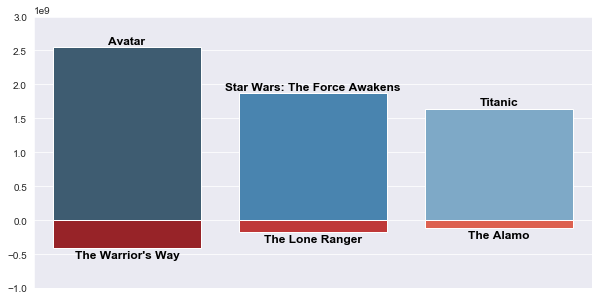

In [57]:
# define figure size,
plt.figure(figsize=(10,5))

# placeholder for each bar
location = [i+1 for i in top_profit.index]

# values for each bar
height = top_profit['profit'].tolist()
height2 = bot_profit['profit'].tolist()

# bar chart using seaborn/ applying palette to distinguish high to low profits 
sns.barplot(location, height, palette='Blues_d') #['#003f5c','#23709c','#45a6e1']
sns.barplot(location, height2, palette= reversed(sns.color_palette('Reds'))) #['#ffa600','#e39d3d','#c5955b']
plt.xticks([]) # remove xticks

# set title, labels, and ticks
title, xlabel, ylabel = ['Top 3 and Bottom 3 Profitable Movies', 'Movies','Profit (USD)']

# adjust figure window
plt.ylim(-1E9,3E9)

# placing each movies' title above or below their bar
for i, v in enumerate(height):
    plt.text(i, v+0.5E8, top_profit['original_title'][i], color='black', 
             fontweight='bold', ha='center', fontsize=12)

for i, v in enumerate(height2):
    plt.text(i, v-1.5E8, bot_profit['original_title'][i], color='black', 
             fontweight='bold', ha='center', fontsize=12);

> - 3 most profitable movies are `Avatar`, `Start Wars: The Force Awakens`, and `Titanic`. <br>
- 3 worst profitable movies are `The Warrior's Way`, `The Lone Ranger`, and `The Alamo`. 
- The difference between `Avatar` and `The Warrior's Way` in profit is approximately 3 billion USD

<a name='question2'></a>
#### Q2. Movie market growth trends

In [24]:
# find sum (total) of `budget` and `revenue` per year using groupby method
df_q2 = df.groupby('release_year').sum()[['budget','revenue']]

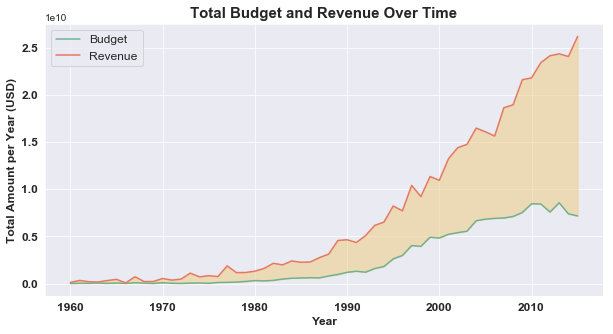

In [53]:
#set x, y axis data
#x1, y1 for total budget; x2, y2 for total revenue
x1, y1, y2 = df_q2.index, df_q2['budget'], df_q2['revenue']

#set size
plt.figure(figsize=(10, 5))

#plot line chart for total budget and revenue
plt.plot(x1, y1, color = '#70B190', label = 'Budget')
plt.plot(x1, y2, color = '#E57865', label = 'Revenue')

#set title, labels, and ticks
#plt.title('Total Budget and Revenue Over Time', fontweight='bold', fontsize=15)
#plt.xlabel('Year', fontweight='bold', fontsize=12)
#plt.ylabel('Total Amount per Year (USD)', fontweight='bold', fontsize=12)
#plt.xticks(fontweight ='bold', fontsize=12)
#plt.yticks(fontweight='bold', fontsize=12)
title, xlabel, ylabel = ['Total Budget and Revenue Over Time', 'Year', 'Total Amount per Year (USD)']
fig_labels(title, xlabel, ylabel)

#set legend
plt.legend(loc='upper left', fontsize=12)

#fill the gap between two curves (represents the difference)
plt.fill_between(x1, y1, y2, color='#EECA7B', alpha = 0.5);

> - The growing gap between budget and revenue indicates that the movie market is definitely growing.
- The revenue growth starts to accelerate in 1990s whereas budget amount tends to maintain at a certain level.

<a name='question3'></a>
#### Q3. How long does the audience want their movie to be ?

In [26]:
mum_table('runtime')

,Carlos,Kid's Story
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
director,Olivier Assayas,Shinichiro Watanabe
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
release_year,2010,2003
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
breakeven,no,no
runtime,338,15
vote_count,35,16


In [27]:
mum_table('vote_average')

,The Shawshank Redemption,Foodfight!
genres,Drama|Crime,Animation|Action|Comedy|Family
director,Frank Darabont,Lawrence Kasanoff
cast,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Charlie Sheen|Wayne Brady|Hilary Duff|Eva Long...
release_year,1994,2012
budget,25000000,65000000
revenue,28341469,73706
profit,3341469,-64926294
breakeven,no,no
runtime,142,87
vote_count,5754,12


In [28]:
# create a subset for question 3 
df_q3 = df[['runtime','vote_count','vote_average','total_vote_point','breakeven']]
df_q3.describe()

,runtime,vote_count,vote_average,total_vote_point
count,3849.000000,3849.000000,3849.000000,3849.000000
mean,109.217459,528.387114,6.168693,3530.315666
std,19.914141,880.333629,0.794697,6369.285145
min,15.000000,10.000000,2.200000,26.400000
25%,95.000000,71.000000,5.700000,409.500000
50%,106.000000,205.000000,6.200000,1248.000000
75%,119.000000,581.000000,6.700000,3660.300000
max,338.000000,9767.000000,8.400000,77159.300000


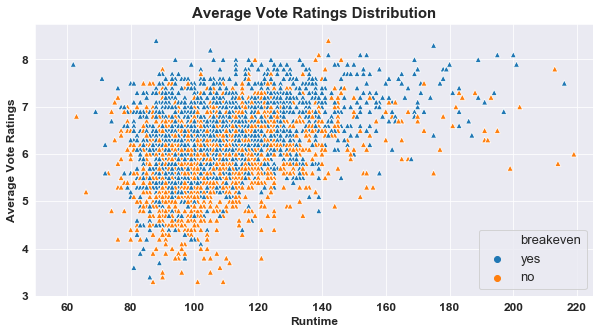

In [39]:
# set x, y axis data
#x for runtime, y for popurlarity;
x, y = df_q3['runtime'], df_q3['vote_average']

#set size
plt.figure(figsize=(10, 5))

#scattered plot for vote ratings vs runtime with hue='break_even'
sns.scatterplot(x='runtime', y='vote_average', data=df_q3, hue='breakeven', marker='^')

#set title, labels, and ticks
title, xlabel, ylabel = ['Average Vote Ratings Distribution', 'Runtime', 'Average Vote Ratings']

fig_labels(title, xlabel, ylabel)

#set figure window to zoom in the dense area
plt.xlim(50,225)
plt.ylim(3,8.75)
plt.legend(loc='lower right', prop={'size':13});

> - We can see that the majority of movies have runtimes between 80 to 140 mins.
- Movies with higher ratings tend to have higher chance to breakeven.

> From this distribution, it's not easy to pull a concise conclusion about the relationships
between vote ratings and runtimes. <br> 
In this question, one should understand that, ***in general***, the overall average of pre-averaged values is not ***equal***<br> 
to the average of the original set of numbers. <br>
This phenomenon is called `Simpson's paradox` and you can check out more about it [here](https://en.wikipedia.org/wiki/Simpson's_paradox)

In [30]:
# create quintile(5) buckets and assign a new column `runtime_level`
quintiles = pd.qcut(df_q3['runtime'],5, ['Very short','Short','Medium', 'Long', 'Very long'])
df_q3 = df_q3.assign(quintiles = quintiles.values)

In [31]:
# quickly find the mean() of vote_average, taking average of average
df_q3_mean = df_q3.groupby('quintiles').mean()['vote_average'].to_frame()
df_q3_mean

,vote_average
quintiles,
Very short,5.844444
Short,5.942910
Medium,6.096728
Long,6.339370
Very long,6.648456


In [32]:
# compute the average from the scratch
df_q3_correct = df_q3.groupby('quintiles').sum()[['vote_count','total_vote_point']]
df_q3_correct['vote_average_new'] = df_q3_correct['total_vote_point']/df_q3_correct['vote_count']
df_q3_correct

,vote_count,total_vote_point,vote_average_new
quintiles,,,
Very short,247591,1550542.5,6.262516
Short,284973,1820333.2,6.387739
Medium,334176,2155691.4,6.450767
Long,424350,2836103.6,6.683407
Very long,742672,5225514.3,7.036100


In [33]:
# compare
df_q3_mean['vote_average'] == df_q3_correct['vote_average_new']

quintiles
Very short    False
Short         False
Medium        False
Long          False
Very long     False
dtype: bool

> As you can see, both series are average values, but they don't match.<br>
Let's continue with the correct values.

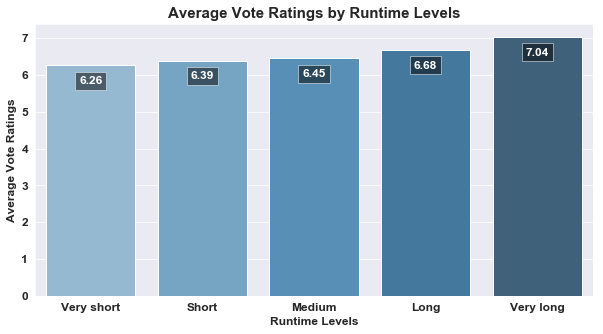

In [38]:
# define figure size
plt.figure(figsize=(10,5))

# placeholder for each bar
location = [i for i in range(len(df_q3_correct.index))]
label = df_q3_correct.index.to_list()
# values for each bar
height = df_q3_correct['vote_average_new'].tolist()

# bar chart using seaborn/ applying palette to distinguish high to low quantity 
sns.barplot(location, height, palette= reversed(sns.color_palette('Blues_d')))

# adjusting title and labels
title, xlabel, ylabel =  ['Average Vote Ratings by Runtime Levels', 'Runtime Levels','Average Vote Ratings']

fig_labels(title, xlabel, ylabel, location, label)

# placing each value inside the bar
for i, v in enumerate(height):
    plt.text(i, v-.5, str(round(height[i],2)), color='white', fontweight='bold', ha='center', fontsize=12, 
             bbox=dict(facecolor='black', alpha=0.5));

> - Longer movies received higher vote ratings on average.

<a name='question4'></a>
#### Q4. Which genres are most popular ?

In [35]:
# use word_count() and save it as a dataframe
df_q4 = word_count('genres').to_frame('count')
df_q4

,count
Drama,1753
Comedy,1357
Thriller,1203
Action,1085
Adventure,749
Romance,666
Crime,651
Science Fiction,519
Horror,463
Family,425


In [36]:
# find total counts
df_q4.sum()

count    10290
dtype: int64

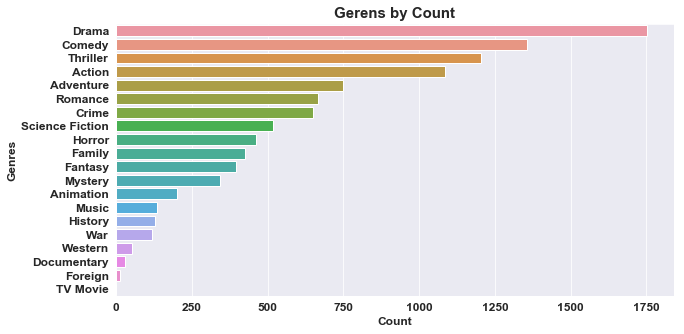

In [37]:
# define figure size
plt.figure(figsize=(10,5))

# horizontal bar chart using seaborn 
sns.barplot(x='count', y=df_q4.index, data=df_q4)

# adjusting title, labels, and ticks
title, xlabel, ylabel = ['Gerens by Count', 'Count', 'Genres']

fig_labels(title,xlabel,ylabel);

> - There are total 10,290 counts consists of 20 unique genres in our dataframe.
- Most popular genre is drama with 1,753 counts and the least popular genre is TV Movie with only 1.

<a name='question5'></a>
#### Q5. 

In [72]:

df_q5 = word_count('director')
df_q5.index[0], df_q5[0]

('Steven Spielberg', 28)

> Out of 1781 directors, Steven Spielberg was the most active director of all with 28 appearances.

In [73]:
# Find movies which Steven Spielberg directed
df_q5 = df[df.director.str.contains('Steven Spielberg')]
df_q5

,original_title,genres,director,cast,release_year,budget,revenue,profit,breakeven,runtime,vote_count,vote_average,total_vote_point,popularity
32,Bridge of Spies,Thriller|Drama,Steven Spielberg,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,2015,40000000,162610473,122610473,yes,141,1638,7.1,11629.8,3.648210
329,Close Encounters of the Third Kind,Science Fiction|Drama,Steven Spielberg,Richard Dreyfuss|FranÃ§ois Truffaut|Teri Garr|...,1977,20000000,303788635,283788635,yes,135,600,7.0,4200.0,1.104816
817,A.I. Artificial Intelligence,Drama|Science Fiction|Adventure,Steven Spielberg,Haley Joel Osment|Frances O'Connor|Sam Robards...,2001,100000000,235926552,135926552,yes,146,1133,6.6,7477.8,2.971372
937,Indiana Jones and the Kingdom of the Crystal S...,Adventure|Action,Steven Spielberg,Harrison Ford|Cate Blanchett|Shia LaBeouf|Ray ...,2008,185000000,786636033,601636033,yes,122,1537,5.6,8607.2,3.161670
1124,The Adventures of Tintin,Adventure|Animation|Action|Family|Mystery,Steven Spielberg,Jamie Bell|Andy Serkis|Daniel Craig|Nick Frost...,2011,130000000,371940071,241940071,yes,107,1448,6.6,9556.8,2.234300
1139,War Horse,Drama|War,Steven Spielberg,Tom Hiddleston|Benedict Cumberbatch|Toby Kebbe...,2011,66000000,177584879,111584879,yes,146,611,6.9,4215.9,1.592819
1305,Catch Me If You Can,Drama|Crime,Steven Spielberg,Leonardo DiCaprio|Tom Hanks|Christopher Walken...,2002,52000000,352114312,300114312,yes,141,2277,7.6,17305.2,2.973115
1308,Minority Report,Action|Thriller|Science Fiction|Mystery,Steven Spielberg,Tom Cruise|Colin Farrell|Samantha Morton|Max v...,2002,102000000,358372926,256372926,yes,145,1595,6.9,11005.5,2.103595
1543,Lincoln,Drama|War,Steven Spielberg,Daniel Day-Lewis|Sally Field|David Strathairn|...,2012,65000000,275293450,210293450,yes,149,993,6.6,6553.8,1.312488
1847,Amistad,Drama|History|Mystery,Steven Spielberg,Morgan Freeman|Nigel Hawthorne|Anthony Hopkins...,1997,36000000,74000000,38000000,yes,155,167,6.6,1102.2,0.221360


In [69]:
word_count('cast', df_q5)

Tom Hanks               4
Harrison Ford           4
Richard Dreyfuss        3
Karen Allen             2
Daniel Craig            2
Lorraine Gary           2
Richard Attenborough    2
Dan Aykroyd             2
Murray Hamilton         2
Jeff Goldblum           2
Tom Cruise              2
John Rhys-Davies        2
Caroline Goodall        2
Anthony Hopkins         1
Dee Wallace             1
Jonathan Sagall         1
Henry Thomas            1
Ben Johnson             1
Chi McBride             1
Albert Brooks           1
Goldie Hawn             1
Frances O'Connor        1
Mark Rylance            1
Justin Chatwin          1
Matthew McConaughey     1
Teri Garr               1
Diego Luna              1
Jake Thomas             1
John Larroquette        1
Margaret Avery          1
                       ..
Robert MacNaughton      1
Leonardo DiCaprio       1
Drew Barrymore          1
Whoopi Goldberg         1
Joerg Stadler           1
Brad Johnson            1
Ray Winstone            1
Max von Sydo

> ## Conclusion

> ### Limitation
- Doens't reflect the whole movie market since it's only 10k movies

<a name='refr'></a>
> ### References:
 - movie break-even https://movies.stackexchange.com/questions/81776/why-is-the-break-even-point-for-movies-usually-twice-the-budget
 - create column using conditional: https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/
 - dropping 0: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741
 - color picker: https://learnui.design/tools/data-color-picker.html
 - Simpson's paradox: https://en.wikipedia.org/wiki/Simpson's_paradox